In [1]:
import os
import numpy as np
import cv2
import gc

In [2]:
#laod the preprocess data
data = np.load('./data/data_preprocess.npz')


In [3]:
X = data['arr_0']
y = data['arr_1']

In [4]:
X.shape, y.shape

((9959, 100, 100, 3), (9959,))

In [5]:
np.unique(y)

array(['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth'],
      dtype='<U15')

In [6]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
onehot = OneHotEncoder()
y_onehot = onehot.fit_transform(y.reshape(-1,1))

In [8]:
y_array = y_onehot.toarray()

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y_array, test_size=0.2, random_state=42)

In [10]:
x_train.shape,x_test.shape,y_test.shape,y_test.shape

((7967, 100, 100, 3), (1992, 100, 100, 3), (1992, 4), (1992, 4))

In [11]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [12]:
#convolutional neural network
model = Sequential([
    layers.Conv2D(16,3,padding='same',input_shape=(100,100,3),activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(192,activation='relu'),
    layers.Dense(28,activation='relu'),
    layers.Dense(4,activation='sigmoid')
])

#Compiling CNN
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0

In [14]:
#training CNN
history = model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=30,epochs=15)

Epoch 1/15
266/266 [==============================] - 24s 90ms/step - loss: 0.2317 - accuracy: 0.9178 - val_loss: 0.0819 - val_accuracy: 0.9744
Epoch 2/15
266/266 [==============================] - 23s 87ms/step - loss: 0.0721 - accuracy: 0.9780 - val_loss: 0.0545 - val_accuracy: 0.9829
Epoch 3/15
266/266 [==============================] - 23s 87ms/step - loss: 0.0458 - accuracy: 0.9852 - val_loss: 0.0600 - val_accuracy: 0.9804
Epoch 4/15
266/266 [==============================] - 23s 87ms/step - loss: 0.0284 - accuracy: 0.9893 - val_loss: 0.0559 - val_accuracy: 0.9839
Epoch 5/15
266/266 [==============================] - 23s 87ms/step - loss: 0.0172 - accuracy: 0.9937 - val_loss: 0.0395 - val_accuracy: 0.9864
Epoch 6/15
266/266 [==============================] - 24s 89ms/step - loss: 0.0214 - accuracy: 0.9933 - val_loss: 0.1119 - val_accuracy: 0.9734
Epoch 7/15
266/266 [==============================] - 23s 88ms/step - loss: 0.0119 - accuracy: 0.9960 - val_loss: 0.0540 - val_accuracy:

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
history_df = pd.DataFrame(history.history)

In [17]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.231684,0.917786,0.081862,0.974398
1,0.072142,0.978034,0.054460,0.982932
2,0.045777,0.985189,0.060031,0.980422
3,0.028404,0.989331,0.055884,0.983936
4,0.017235,0.993724,0.039542,0.986446
5,0.021377,0.993348,0.111877,0.973394
6,0.011910,0.995983,0.053975,0.985442
7,0.010528,0.996611,0.045981,0.989458
8,0.000739,1.000000,0.049095,0.988454
9,0.011437,0.996109,0.058574,0.984438


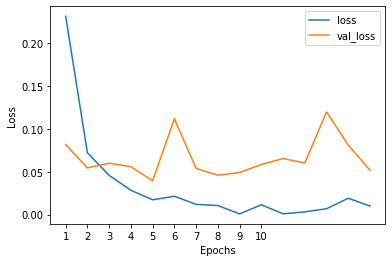

In [18]:
history_df[['loss','val_loss']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()

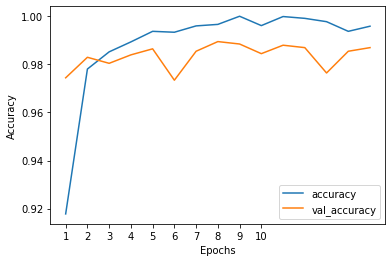

In [19]:
history_df[['accuracy','val_accuracy']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()

In [20]:
#save CNN model
model.save('face_cnn_model')

INFO:tensorflow:Assets written to: face_cnn_model\assets


In [21]:
onehot.categories_

[array(['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth'],
       dtype='<U15')]